In [4]:
# Comparison of SPH velocities and FoF velocities

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csiborgtools

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [8]:
kind = "main"
nsnap = 99
nsim = 17417

field_reader = csiborgtools.read.CSiBORG2Field(nsim, kind)
catalogue = csiborgtools.read.CSiBORG2Catalogue(nsim, nsnap, kind)
boxsize = csiborgtools.simname2boxsize("csiborg2_main")

In [9]:
velocity_field = field_reader.velocity_field("SPH", 1024)

In [35]:
pos = catalogue["cartesian_pos"] / boxsize
vel = catalogue["cartesian_vel"]

spherical_pos = catalogue["spherical_pos"]
RA = np.deg2rad(spherical_pos[:, 1])
dec = np.deg2rad(spherical_pos[:, 2])

def project_radial(vx, vy, vz, RA, dec):
    vr = vx * np.cos(dec) * np.cos(RA) + vy * np.cos(dec) * np.sin(RA) + vz * np.sin(dec)
    return vr

In [36]:
vx, vy, vz = csiborgtools.field.evaluate_cartesian_cic(velocity_field[0], velocity_field[1], velocity_field[2], pos=pos)

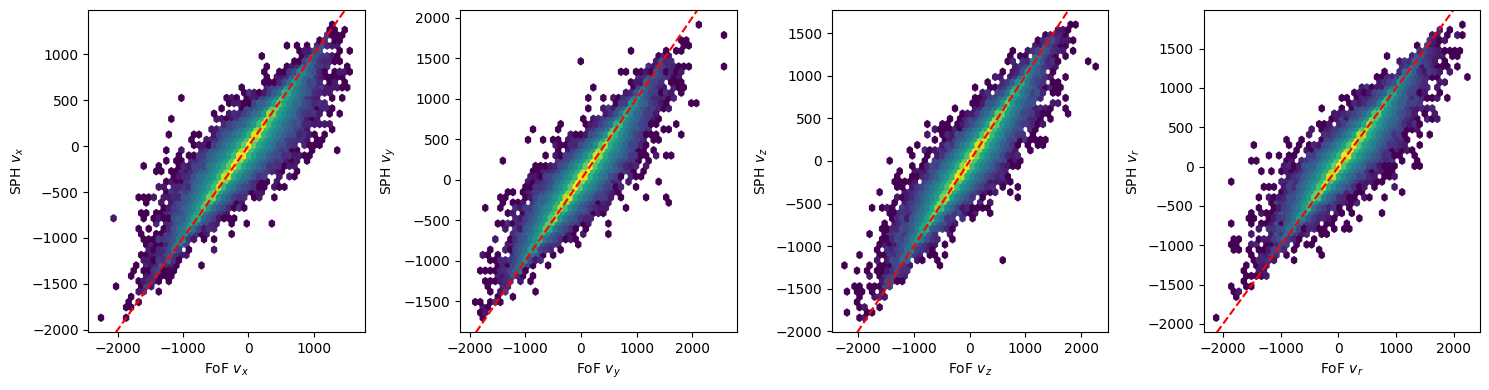

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].hexbin(vel[:, 0], vx, gridsize=50, bins="log", mincnt=1)
axs[0].set_xlabel(r"FoF $v_x$")
axs[0].set_ylabel(r"SPH $v_x$")

axs[1].hexbin(vel[:, 1], vy, gridsize=50, bins="log", mincnt=1)
axs[1].set_xlabel(r"FoF $v_y$")
axs[1].set_ylabel(r"SPH $v_y$")

axs[2].hexbin(vel[:, 2], vz, gridsize=50, bins="log", mincnt=1)
axs[2].set_xlabel(r"FoF $v_z$")
axs[2].set_ylabel(r"SPH $v_z$")


vr_fof = project_radial(vel[:, 0], vel[:, 1], vel[:, 2], RA, dec)
vr_sph = project_radial(vx, vy, vz, RA, dec)
axs[3].hexbin(vr_fof, vr_sph, gridsize=50, bins="log", mincnt=1)
axs[3].set_xlabel(r"FoF $v_r$")
axs[3].set_ylabel(r"SPH $v_r$")

for i in range(4):
    axs[i].axline([0, 0], [1, 1], color="red", ls="--")

fig.tight_layout()
fig.savefig("../plots/velocity_comparison.png")
fig.show()

array([-142.4347  , -352.1869  , -246.83447 , ...,  105.4134  ,
         12.874686,  -80.65092 ], dtype=float32)